## Key concepts

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

In [180]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

2.10.0


## Creating data to view and fit

Since we're working on a **regression problem** (predicting a number) let's create some linear data (a straight line) to model.

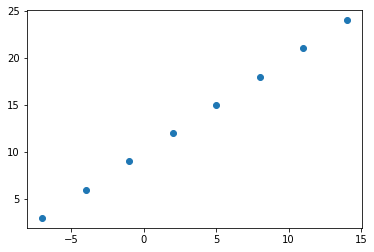

In [181]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [182]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [183]:
house_info.shape

TensorShape([3])

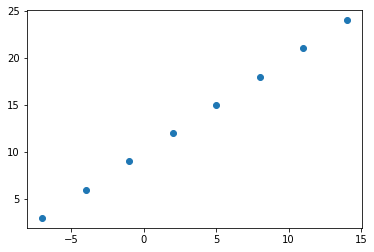

In [184]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

Our goal here will be to use `X` to predict `y`.

So our **input** will be `X` and our **output** will be `y`.

Lets look at input and output shapes

In [185]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

We're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.

In [186]:
# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

## Steps in modelling with TensorFlow


1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) 
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.

In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`. 

In [187]:
X.shape

TensorShape([8])

In [188]:
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]], dtype=float32)>

In [189]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mse"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 239ms/step - loss: 22.0157 - mse: 731.5938
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 21.6226 - mse: 707.0095
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 21.2294 - mse: 682.8944
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 20.8363 - mse: 659.2487
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 20.4657 - mse: 636.0720


In [190]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [191]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 57ms/step


array([[-24.11269]], dtype=float32)

It doesn't go very well... it should've output something close to 27.0.

## Improving a model

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [192]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 237ms/step - loss: 14.3587 - mae: 14.3587
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 14.2262 - mae: 14.2262
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 14.0937 - mae: 14.0937
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 13.9612 - mae: 13.9612
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 13.8287 - mae: 13.8287
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 13.6962 - mae: 13.6962
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 13.5637 - mae: 13.5637
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 13.4312 - mae: 13.4312
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 13.2987 - mae: 13.2987
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 13.1662 - mae: 13.1662
Epoch 11/100
1/1 [==============================] - 0s 3m

1/1 [==============================] - 0s 4ms/step - loss: 6.9075 - mae: 6.9075
Epoch 89/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9019 - mae: 6.9019
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8963 - mae: 6.8963
Epoch 91/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8906 - mae: 6.8906
Epoch 92/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8850 - mae: 6.8850
Epoch 93/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8794 - mae: 6.8794
Epoch 94/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8738 - mae: 6.8738
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8681 - mae: 6.8681
Epoch 96/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8625 - mae: 6.8625
Epoch 97/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8569 - mae: 6.8569
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8513 - ma

In [193]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [194]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 61ms/step


array([[29.441723]], dtype=float32)

Much better! 

## Neural Network workflow

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
Visualize the data, output
```

In [195]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [196]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

Since $y=X+10$

In [197]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Split data into training/test set

* **Training set** -  70-80% of the total data available
* **Validation set** - Model tuning - 10-15% of the total data available
* **Test set** - 10-15% of the total data available.

In [198]:
# Check how many samples we have
len(X)

50

In [199]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualizing the data


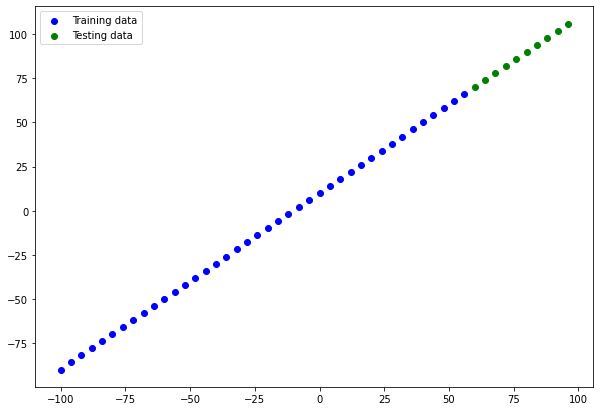

In [200]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

blue dots (`X_train`), green dots (`X_test`).

In [201]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) 

## Visualizing the model



In [202]:
# Doesn't work (model not fit/built)
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

The cell above errors because we haven't fit our built our model.

We also haven't told it what input shape it should be expecting.

We can let our model know the input shape of our data using the `input_shape` parameter to the first layer (usually if `input_shape` isn't defined, Keras tries to figure it out automatically).

In [203]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [204]:
# This will work after specifying the input shape
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (transfer learning).

In [205]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [206]:
# Check the model summary
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Alongside summary, you can also view a 2D plot of the model using [`plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

In [207]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In our case, the model we used only has an input and an output but visualizing more complicated models can be very helpful for debugging.

## Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels - `y_test` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (`X_test`), remember the model has never seen the test data.

In [208]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 38ms/step


In [209]:
# View the predictions
y_preds

array([[ 74.56726 ],
       [ 79.45383 ],
       [ 84.34039 ],
       [ 89.22696 ],
       [ 94.113525],
       [ 99.00009 ],
       [103.886665],
       [108.77323 ],
       [113.6598  ],
       [118.546364]], dtype=float32)

In [210]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

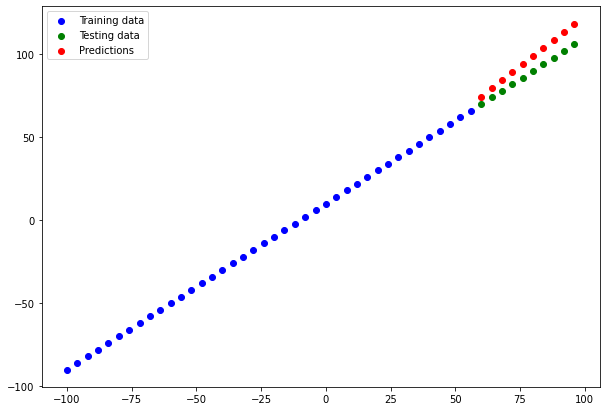

In [211]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

From the plot we can see our predictions aren't totally wrong but it can be better.

## Evaluating predictions

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [212]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 88ms/step - loss: 8.5568 - mae: 8.5568


[8.556811332702637, 8.556811332702637]

In our case, since we used MAE for the loss function as well as MAE for the metrics, `model.evaulate()` returns them both.

TensorFlow also has built in functions for MSE and MAE.


In [213]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.459643, 11.818469, 10.331922, 10.      , 10.84541 , 13.000055,
       16.309332, 20.773232, 25.659796, 30.546362], dtype=float32)>

MAE should be a single output.

Instead, we get 10 values.

This is because our `y_test` and `y_preds` tensors are different shapes.

In [214]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [215]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds

array([[ 74.56726 ],
       [ 79.45383 ],
       [ 84.34039 ],
       [ 89.22696 ],
       [ 94.113525],
       [ 99.00009 ],
       [103.886665],
       [108.77323 ],
       [113.6598  ],
       [118.546364]], dtype=float32)

In [216]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

Remember how we discussed dealing with different input and output shapes is one the most common issues you'll come across, this is one of those times.

We can fix it using [`squeeze()`](https://www.tensorflow.org/api_docs/python/tf/squeeze), it'll remove the the `1` dimension from our `y_preds` tensor, making it the same shape as `y_test`.

In [217]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [218]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [219]:
# What do they look like?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([ 74.56726 ,  79.45383 ,  84.34039 ,  89.22696 ,  94.113525,
         99.00009 , 103.886665, 108.77323 , 113.6598  , 118.546364],
       dtype=float32))

Okay, now we know how to make our `y_test` and `y_preds` tenors the same shape, let's use our evaluation metrics.

In [220]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=8.556811>

In [221]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=79.70354>

We can also calculate the MAE using pure TensorFlow functions.

In [222]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=8.5568115234375>

Let's make functions for our evaluation metrics.

In [223]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

## Running experiments to improve a model

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [224]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 90.5641 - mae: 90.5641
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 55.1086 - mae: 55.1086
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 18.8293 - mae: 18.8293
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1357 - mae: 10.1357
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1270 - mae: 11.1270
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 10.2782 - mae: 10.2782
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2826 - mae: 9.2826
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2001 - mae: 9.2001
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 11.8389 - mae: 11.8389
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 13.7728 - mae: 13.7728
Epoch 11/100
2/2 [==============================] - 0s 3ms/step

2/2 [==============================] - 0s 2ms/step - loss: 10.4489 - mae: 10.4489
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 7.0044 - mae: 7.0044
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 13.7652 - mae: 13.7652
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 7.8713 - mae: 7.8713
Epoch 92/100
2/2 [==============================] - 0s 3ms/step - loss: 7.9623 - mae: 7.9623
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 9.4632 - mae: 9.4632
Epoch 94/100
2/2 [==============================] - 0s 3ms/step - loss: 8.7799 - mae: 8.7799
Epoch 95/100
2/2 [==============================] - 0s 3ms/step - loss: 9.9082 - mae: 9.9082
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 7.3547 - mae: 7.3547
Epoch 97/100
2/2 [==============================] - 0s 3ms/step - loss: 6.7726 - mae: 6.7726
Epoch 98/100
2/2 [==============================] - 0s 4ms/step - loss: 8.4807 

1/1 [==============================] - 0s 38ms/step


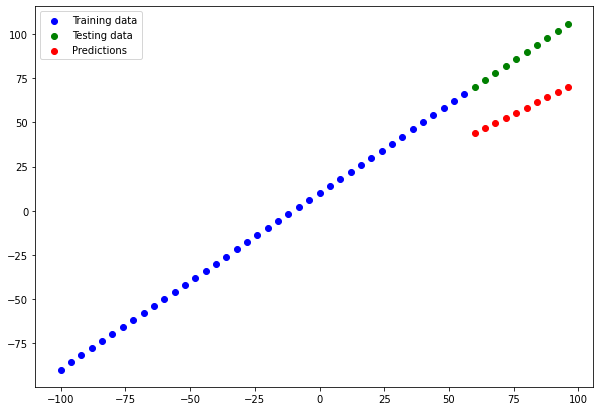

In [225]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [226]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(31.002792, 971.93005)

**Build `model_2`**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [241]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae','mse'])

# Fit the model
history = model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=11, verbose=1) # set verbose to 0 for less output
#history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/11
2/2 [==============================] - 0s 3ms/step - loss: 80.5174 - mae: 80.5174 - mse: 9172.6523
Epoch 2/11
2/2 [==============================] - 0s 3ms/step - loss: 35.6191 - mae: 35.6191 - mse: 1779.7986
Epoch 3/11
2/2 [==============================] - 0s 3ms/step - loss: 8.7219 - mae: 8.7219 - mse: 119.4639
Epoch 4/11
2/2 [==============================] - 0s 3ms/step - loss: 8.1902 - mae: 8.1902 - mse: 110.4999
Epoch 5/11
2/2 [==============================] - 0s 2ms/step - loss: 10.0712 - mae: 10.0712 - mse: 155.0157
Epoch 6/11
2/2 [==============================] - 0s 3ms/step - loss: 17.5258 - mae: 17.5258 - mse: 405.1757
Epoch 7/11
2/2 [==============================] - 0s 3ms/step - loss: 14.6878 - mae: 14.6878 - mse: 292.4789
Epoch 8/11
2/2 [==============================] - 0s 3ms/step - loss: 15.8651 - mae: 15.8651 - mse: 336.2991
Epoch 9/11
2/2 [==============================] - 0s 2ms/step - loss: 27.9460 - mae: 27.9460 - mse: 1064.6526
Epoch 10/11
2/2 [===

1/1 [==============================] - 0s 45ms/step


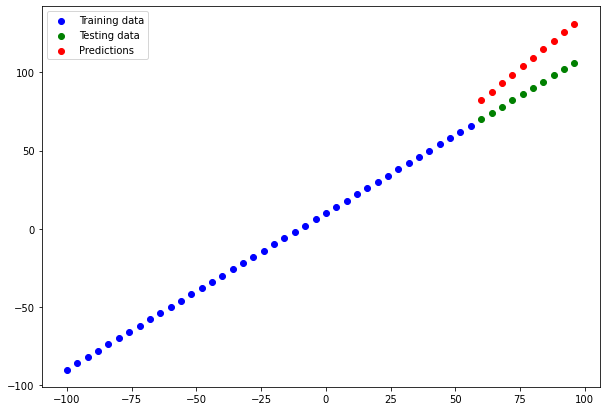

In [242]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

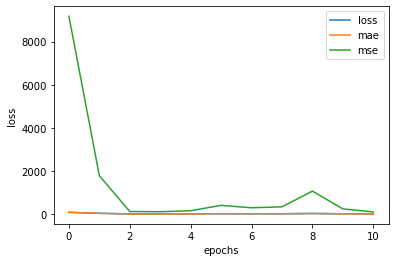

In [243]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

That's looking better already! And all it took was an extra layer.

In [53]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(10.736046, 123.166954)

**Build `model_3`**

For our 3rd model, we'll keep everything the same as `model_2` except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [129]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 47ms/step


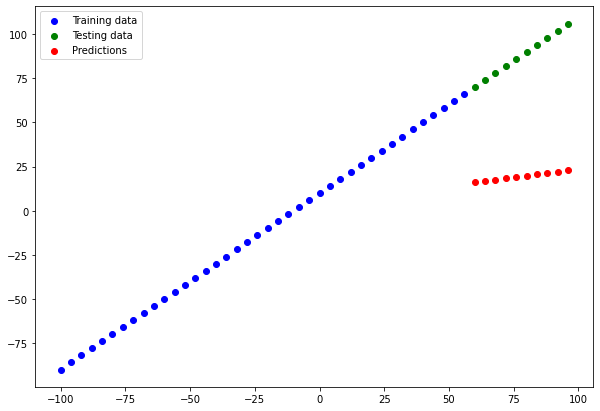

In [130]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [131]:
y_preds_3

array([[15.990361],
       [16.76026 ],
       [17.530157],
       [18.300055],
       [19.069954],
       [19.839851],
       [20.609749],
       [21.379646],
       [22.149546],
       [22.919443]], dtype=float32)

Strange, we trained for longer but our model performed worse?

As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).

In [132]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.5451, 4784.507)

## Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.

In [133]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [134]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.665873,950.844421
1,model_2,10.736046,123.166954
2,model_3,68.545097,4784.506836


From our experiments, it looks like `model_2` performed the best.

Training a model for longer) may not always work and the exact opposite is also often the case.

## Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

## A larger example
We are going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

we will use the pubically available Medical Cost dataset available from Kaggle and hosted on GitHub.

In [60]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [245]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the [`get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method in pandas.

It converts categorical variables (like the `sex`, `smoker` and `region` columns) into numerical variables using one-hot encoding.

In [246]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Now we'll split data into features (`X`) and labels (`y`).

In [247]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [248]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


And create training and test sets. We could do this manually, but to make it easier, we'll leverage the already available [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function available from Scikit-Learn.

In [249]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

Now we can build and fit a model (we'll make it the same as `model_2`).

In [250]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8731.6768 - mae: 8731.6768
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7887.0479 - mae: 7887.0479
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7588.7773 - mae: 7588.7773
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7785.0625 - mae: 7785.0625
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7769.2036 - mae: 7769.2036
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7588.9160 - mae: 7588.9160
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7586.7559 - mae: 7586.7559
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7797.6323 - mae: 7797.6323
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7485.5654 - mae: 7485.5654
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7747.3550 - mae: 7747.3550

34/34 [==============================] - 0s 1ms/step - loss: 7343.7432 - mae: 7343.7432
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 7492.7007 - mae: 7492.7007
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 7354.7319 - mae: 7354.7319
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 7344.6646 - mae: 7344.6646
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 7518.8013 - mae: 7518.8013
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 7189.1968 - mae: 7189.1968
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 7378.3135 - mae: 7378.3135
Epoch 89/100
34/34 [==============================] - 0s 1ms/step - loss: 7428.1782 - mae: 7428.1782
Epoch 90/100
34/34 [==============================] - 0s 1ms/step - loss: 6984.3940 - mae: 6984.3940
Epoch 91/100
34/34 [==============================] - 0s 1ms/step - loss: 7182.4790 - mae: 7182.4790
Epo

In [251]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 6938.9995 - mae: 6938.9995


[6938.99951171875, 6938.99951171875]

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:
- Increasing the number of layers (2 -> 3).
- Increasing the number of units in each layer (except for the output layer).
- Changing the optimizer (from SGD to Adam).

Everything else will stay the same.

In [262]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13285.9189 - mae: 13285.9189
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13111.7783 - mae: 13111.7783
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12748.8789 - mae: 12748.8789
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12052.9297 - mae: 12052.9297
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10915.1240 - mae: 10915.1240
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9481.9727 - mae: 9481.9727
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8170.7534 - mae: 8170.7534
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.7432 - mae: 7537.7432
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7430.6470 - mae: 7430.6470
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7409.7305 - mae:

34/34 [==============================] - 0s 1ms/step - loss: 5826.5737 - mae: 5826.5737
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 5798.7524 - mae: 5798.7524
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 5766.0488 - mae: 5766.0488
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 5740.2466 - mae: 5740.2466
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 5707.3896 - mae: 5707.3896
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 5669.8906 - mae: 5669.8906
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 5636.4512 - mae: 5636.4512
Epoch 89/100
34/34 [==============================] - 0s 1ms/step - loss: 5597.2310 - mae: 5597.2310
Epoch 90/100
34/34 [==============================] - 0s 1ms/step - loss: 5557.1523 - mae: 5557.1523
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 5522.5381 - mae: 5522.5381
Epo

In [263]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4940.6655 - mae: 4940.6655


[4940.66552734375, 4940.66552734375]

Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.

Let's check out the loss curves of our model, we should see a downward trend.

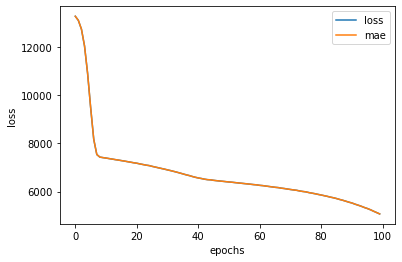

In [264]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) so it stops automatically when it stops improving. 

Let's train the same model as above for a little longer. We can do this by calling fit on it again.

In [265]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

How did the extra training go?

In [266]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3501.6514 - mae: 3501.6514


(3501.6513671875, 3501.6513671875)

Training for an extra 100 epochs we see about a 10% decrease in error.

How does the visual look?

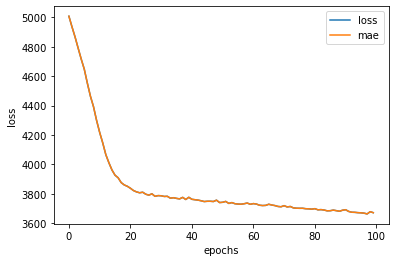

In [267]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

We've already turned our data into numbers using `get_dummies()`, let's see how we'd normalize it.

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [269]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing transformations:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

Let's see them in action.

In [270]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

Now we've normalized it and one-hot encoding it, what does our data look like now?

In [271]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [272]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

How about the shapes?

In [273]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

Our data is normalized and numerical, let's model it.

We'll use the same model as `insurance_model_2`.

In [274]:
# Set random seed
tf.random.set_seed(145)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

Let's evaluate the model on normalized test set.

In [275]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3170.6399 - mae: 3170.6399


And finally, let's compare the results from `insurance_model_2` (trained on non-normalized data) and `insurance_model_3` (trained on normalized data).

In [276]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3501.6513671875, 3170.639892578125)

From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

This is **one of the main benefits of normalization: faster convergence time** 

`insurance_model_2` may have eventually achieved the same results as `insurance_model_3` if we left it training for longer. 

Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.


In [ ]:
Y = 100
x = 20
x_norm = 0.2
w = 500

Y= w*x = 500 *0.2 = 100

x_test = 20 = 0.2
w * x_test = 500 * 20 = 10000
Y = 100